The idea is to look at the evolution of actors' ethnicity diversity in movies across time. The final plot will be a stacked barchart representing the proportion of each ethnicity in movies

I. First analysis of ethnicity

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
characters = pd.read_csv('./data/cleanData/characters_cleaned.csv')
characters.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
# compute the total number of ethnicities present in the dataframe
print(len(characters['ethnicity_freebase_id'].unique()))

480


In [6]:
#remove the lines with no info on ethnicity
characters_modified = characters.dropna(subset='ethnicity_freebase_id')
characters_modified.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp


In [20]:
print(len(characters_modified['ethnicity_freebase_id'].unique()))

479


II. Grouping the dataframe by movies and years

In [7]:
# extracting the release year from the release date. The year is enough
# function that return the year of release of a movie
def getReleaseYear(release_date):
    date = pd.to_datetime(release_date, format = "%Y-%m-%d")
    return date.year
characters_modified['release_year'] = characters_modified['release_date'].apply(getReleaseYear)
characters_modified.head()

C:\Users\richa\AppData\Local\Temp\ipykernel_2116\1283788174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_modified['release_year'] = characters_modified['release_date'].apply(getReleaseYear)


,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,release_year
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001.0
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,2001.0
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,2000.0


In [8]:
characters_grouped = characters_modified.groupby(['release_year', 'freebase_id'])
characters_grouped.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,release_year
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001.0
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,2001.0
27,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450586,24997872,/m/09g6klx,2010-05-07,Surya,1982-10-16,M,1.810,/m/0dryh9k,Prithviraj Sukumaran,27.0,/m/0gw0rm2,/m/0gz549m,/m/0cqcgj,2010.0
450587,24997872,/m/09g6klx,2010-05-07,Aswathy,1982-09-11,F,1.680,/m/0dryh9k,Shriya Saran,27.0,/m/0gw423l,/m/0gyf84q,/m/09r_wb,2010.0
450588,24997872,/m/09g6klx,2010-05-07,NaN,1944-08-01,M,NaN,/m/01rv7x,Delhi Ganesh,65.0,/m/0h6krrl,NaN,/m/04cw5sb,2010.0
450601,32837210,/m/0h3pdgp,2011-09-22,NaN,1979-07-10,M,1.820,/m/01xhh5,Gong Yoo,32.0,/m/0h9fhpy,NaN,/m/02x9y8g,2011.0


In [9]:
# compute number of ethnicities 
number_ethnicities = pd.DataFrame(characters_grouped['ethnicity_freebase_id'].nunique())
number_ethnicities.reset_index(inplace=True)
print(number_ethnicities)

       release_year freebase_id  ethnicity_freebase_id
0            1908.0   /m/0kv1g0                      1
1            1909.0  /m/03cdj1s                      1
2            1909.0  /m/03cdj3v                      1
3            1909.0  /m/03cdj4j                      1
4            1910.0  /m/03cdj9b                      1
...             ...         ...                    ...
20944        2013.0  /m/0k8756q                      2
20945        2013.0  /m/0k9390g                      4
20946        2014.0  /m/0jt01_6                      1
20947        2014.0  /m/0k0tq97                      4
20948        2014.0  /m/0kdy118                      7

[20949 rows x 3 columns]


release_year
1908.0    1.000000
1909.0    1.000000
1910.0    1.000000
1911.0    1.000000
1912.0    1.250000
            ...   
2010.0    2.803946
2011.0    2.740077
2012.0    2.541910
2013.0    3.867647
2014.0    4.000000
Name: ethnicity_freebase_id, Length: 107, dtype: float64


Text(0.5, 1.0, 'Evolution of the number of ethnies per movie')

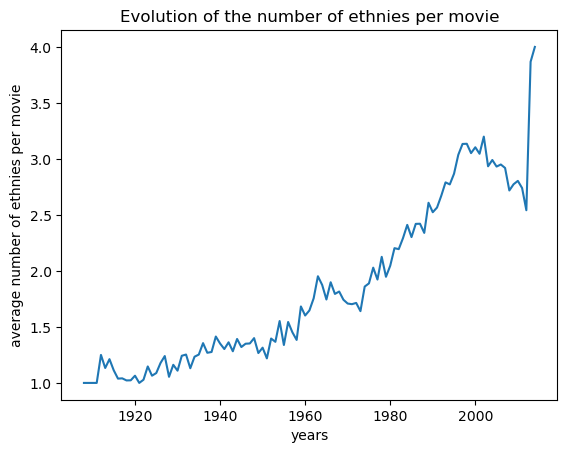

In [10]:
#computing the average number of ethnicities in movie per year
number_ethnicities_grouped = number_ethnicities.groupby(number_ethnicities.release_year)
average_ethnicity_per_year = number_ethnicities_grouped['ethnicity_freebase_id'].mean()
print(average_ethnicity_per_year)

#ploting the results
plt.plot(average_ethnicity_per_year.index, average_ethnicity_per_year.values)
plt.xlabel('years')
plt.ylabel('average number of ethnies per movie')
plt.title('Evolution of the number of ethnies per movie')

The number of ethnicities per movies is increasing overtime. Now we want to look at the evolution of each ethnicity. The objective is to draw a stacked barchart. However, we have 480 different ethnicities, too much for an easily interpretable stacked barchart. 

First, we will try to group the ethnicities by continent or by region of origin.
Then, we can plot one barchart for each region and a global staked barchart with the regions of origins instead of the ethnicities. It will be easier to interprete.

In [56]:
print(characters_modified['ethnicity_freebase_id'].unique())

['/m/044038p' '/m/0x67' '/m/064b9n' '/m/041rx' '/m/033tf_' '/m/04gfy7'
 '/m/0222qb' '/m/01qhm_' '/m/0dryh9k' '/m/048sp5' '/m/04mvp8' '/m/0bzkm2'
 '/m/02p1pl6' '/m/0bjbszh' '/m/022fdt' '/m/0cqgdq' '/m/0ffkb4'
 '/m/075dhf0' '/m/01hwt' '/m/0xnvg' '/m/0dqqwy' '/m/048z7l' '/m/07bch9'
 '/m/09v5bdn' '/m/02w7gg' '/m/03bkbh' '/m/02vsw1' '/m/09kr66' '/m/09vc4s'
 '/m/0g0x7_' '/m/042gtr' '/m/0cm7w1' '/m/046cwm' '/m/04dbw3' '/m/02ctzb'
 '/m/0g8_vp' '/m/092h2qt' '/m/0g6ff' '/m/0278pqj' '/m/0301y_' '/m/019kn7'
 '/m/0cnvdq1' '/m/03295l' '/m/065b6q' '/m/03pqwy' '/m/01xhh5' '/m/03ts0c'
 '/m/06gbnc' '/m/07hwkr' '/m/0bpjh3' '/m/0fpjs3j' '/m/04nrnz' '/m/09k5jvk'
 '/m/07mqps' '/m/08hpk0' '/m/03ttfc' '/m/0d9q7j' '/m/075_n6' '/m/0dllcfn'
 '/m/04kbvpz' '/m/03ftx7' '/m/0747611' '/m/025rpb0' '/m/06mvq'
 '/m/047l_90' '/m/029f2r' '/m/01rv7x' '/m/05sf2x' '/m/01336l' '/m/0bh91q8'
 '/m/01g7zj' '/m/0cn68' '/m/02sch9' '/m/0fqp6zk' '/m/02y_9mh' '/m/0d7wh'
 '/m/0g96wd' '/m/047948f' '/m/04ggbzy' '/m/04q7gbh' '/m/013xrm'
 

In [79]:
#associating each freebase ID with the corresponding ethnicity
import requests
import json
import time

# List of Freebase IDs 
freebase_ids = characters_modified['ethnicity_freebase_id'].unique()

# Wikidata SPARQL endpoint
sparql_url = "https://query.wikidata.org/sparql"

# Function to query Wikidata for ethnicity by Freebase ID
def getEthnicityByFreebaseId(freebase_id):
    query = f"""
    SELECT ?ethnicity ?ethnicityLabel WHERE {{
        ?ethnicity wdt:P646 "{freebase_id}".
        SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
    }}
    """
    response = requests.get(sparql_url, params={'query': query, 'format': 'json'})
    
    try:
        data = response.json()
    except requests.exceptions.JSONDecodeError:
        print("Failed to decode JSON")
        print(response.text)  # Show the problematic response
        return []  # Return an empty list
    
    # extracting ethnicity labels
    results = data.get("results", {}).get("bindings", [])
    ethnicity_labels = [result["ethnicityLabel"]["value"] for result in results]
    return ethnicity_labels

# Loop through each Freebase ID and retrieve ethnicity. Creating a dictionnary for ethnicities
ethnicities = {}
for freebase_id in freebase_ids:
    ethnicities[freebase_id] = getEthnicityByFreebaseId(freebase_id)
    time.sleep(1) #if the time is smaller, all requests are not answered


In [80]:
for freebase_id, ethnicity in ethnicities.items():
    print(f"Freebase ID: {freebase_id}, Ethnicity: {ethnicity}")

Freebase ID: /m/044038p, Ethnicity: []
Freebase ID: /m/0x67, Ethnicity: ['African Americans']
Freebase ID: /m/064b9n, Ethnicity: ['Omaha Tribe of Nebraska']
Freebase ID: /m/041rx, Ethnicity: ['Jewish people']
Freebase ID: /m/033tf_, Ethnicity: ['Irish Americans']
Freebase ID: /m/04gfy7, Ethnicity: ['Indian Americans']
Freebase ID: /m/0222qb, Ethnicity: ['Italians']
Freebase ID: /m/01qhm_, Ethnicity: ['German Americans']
Freebase ID: /m/0dryh9k, Ethnicity: ['Indians']
Freebase ID: /m/048sp5, Ethnicity: ['Ezhava']
Freebase ID: /m/04mvp8, Ethnicity: ['Malayali']
Freebase ID: /m/0bzkm2, Ethnicity: ['Taiwanese people']
Freebase ID: /m/02p1pl6, Ethnicity: []
Freebase ID: /m/0bjbszh, Ethnicity: []
Freebase ID: /m/022fdt, Ethnicity: ['Armenians']
Freebase ID: /m/0cqgdq, Ethnicity: ['Marathi people']
Freebase ID: /m/0ffkb4, Ethnicity: ['Lithuanian Americans']
Freebase ID: /m/075dhf0, Ethnicity: []
Freebase ID: /m/01hwt, Ethnicity: ['Black people']
Freebase ID: /m/0xnvg, Ethnicity: ['Italian Ame

In [81]:
#removing empty lines from the dictionnary
ethnicities = {k: v for k, v in ethnicities.items() if v}
for freebase_id, ethnicity in ethnicities.items():
    print(f"Freebase ID: {freebase_id}, Ethnicity: {ethnicity}")


Freebase ID: /m/0x67, Ethnicity: ['African Americans']
Freebase ID: /m/064b9n, Ethnicity: ['Omaha Tribe of Nebraska']
Freebase ID: /m/041rx, Ethnicity: ['Jewish people']
Freebase ID: /m/033tf_, Ethnicity: ['Irish Americans']
Freebase ID: /m/04gfy7, Ethnicity: ['Indian Americans']
Freebase ID: /m/0222qb, Ethnicity: ['Italians']
Freebase ID: /m/01qhm_, Ethnicity: ['German Americans']
Freebase ID: /m/0dryh9k, Ethnicity: ['Indians']
Freebase ID: /m/048sp5, Ethnicity: ['Ezhava']
Freebase ID: /m/04mvp8, Ethnicity: ['Malayali']
Freebase ID: /m/0bzkm2, Ethnicity: ['Taiwanese people']
Freebase ID: /m/022fdt, Ethnicity: ['Armenians']
Freebase ID: /m/0cqgdq, Ethnicity: ['Marathi people']
Freebase ID: /m/0ffkb4, Ethnicity: ['Lithuanian Americans']
Freebase ID: /m/01hwt, Ethnicity: ['Black people']
Freebase ID: /m/0xnvg, Ethnicity: ['Italian Americans']
Freebase ID: /m/0dqqwy, Ethnicity: ['Danish Americans']
Freebase ID: /m/048z7l, Ethnicity: ['American Jews']
Freebase ID: /m/07bch9, Ethnicity: ['S

In [82]:
len(ethnicities)

431

In the process of building the dictionnary, only 48 ethnicities were lost. It means that we can use the dictionnary for our plots with an amout of data that is still relevant

In [84]:
# building a new file that contains the dictionnary
def saveDictionnary(dict, name):
    with open('./data/freebaseIdDictionnaries/' + name, 'w') as fp:
        json.dump(dict, fp, indent=4)

saveDictionnary(ethnicities, 'ethnicities')

In [91]:
# for each ethnicity, getting the associated continent

# Function to query Wikidata for continent by Freebase ID
def getContinentByFreebaseId(freebase_id):
    query = f"""
    SELECT ?ethnicity ?continentLabel WHERE {{
            ?ethnicity wdt:P30 "{freebase_id}".
            SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
    }}
    """
    response = requests.get(sparql_url, params={'query': query, 'format': 'json'})
    
    try:
        data = response.json()
    except requests.exceptions.JSONDecodeError:
        print("Failed to decode JSON")
        print(response.text)  # Show the problematic response
        return []  # Return an empty list
    
    # extracting continent labels
    results = data.get("results", {}).get("bindings", [])
    continent_labels = [result["continentLabel"]["value"] for result in results]
    return continent_labels

getContinentByFreebaseId('/m/0222qb')

[]